In [1]:
import pandas as pd
import numpy as np
# visualizatoin

import seaborn as sns
import matplotlib.pyplot as plt
# modeling helper functions
from sklearn.model_selection import train_test_split

#others
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()


%matplotlib inline

In [2]:
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


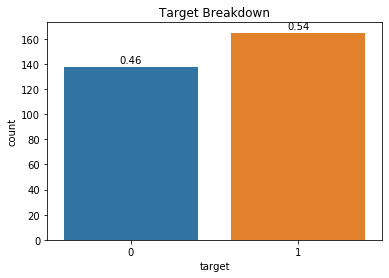

In [3]:
plt.figure(1)
plt.title(label="Target Breakdown")
ax = sns.countplot(df['target'],hue=None)
total = float(len(df['target']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

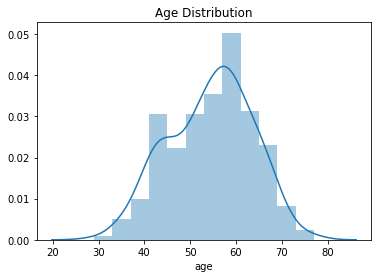

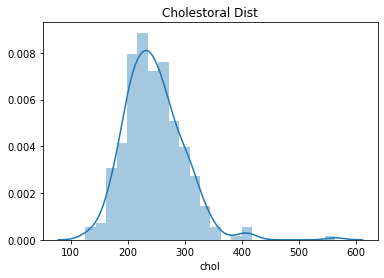

In [4]:
plt.figure(1)
plt.title("Age Distribution")
ax = sns.distplot(df['age'])
plt.figure(2)
plt.title("Cholestoral Dist")
ax = sns.distplot(df['chol'])

Investigate the relationship between age,cholestoral, and heart disease

<Figure size 432x288 with 0 Axes>

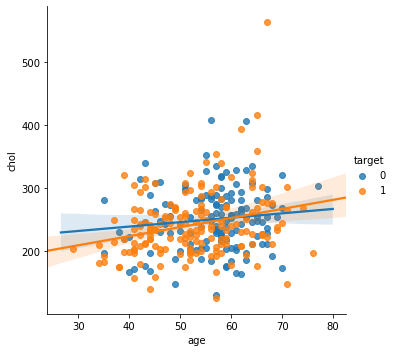

In [5]:
# plot 
plt.figure(1)
sns.lmplot(x='age',y='chol',data =df,hue='target',fit_reg=True)

Older People are more likely to have higher cholestoral and more likely to have heart disease.
Let's explore some other breakdowns to see if we can mine any more useful information. 

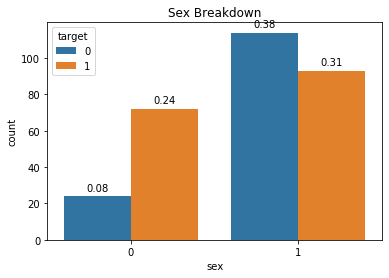

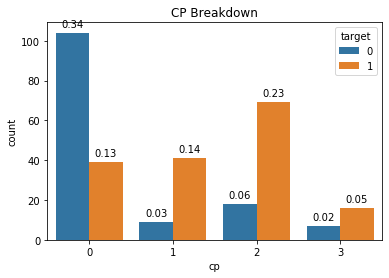

In [7]:
plt.figure(1)
plt.title(label="Sex Breakdown")
ax = sns.countplot(df['sex'],hue=df['target'])
for p in ax.patches:
    total = float(len(df['target']==p))
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
    
plt.figure(2)
plt.title(label="CP Breakdown")
ax = sns.countplot(df['cp'],hue=df['target'])
for p in ax.patches:
    total = float(len(df['target']==p))
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
    





If your CP = 0 you are 3x as likely to not have heart disease than have it. However, if your CP = 2 you are ~4x as likely to have heart disease than not have it. 

In [13]:
x = df.drop('target',axis=1)
y = df['target']
features = x.columns.to_list()

In [27]:
#split the data sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [10]:
print("input variables")
print(x.head())
print("Target")
print(y.head())

input variables
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
Target
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


# Feature selection 
### Recursive Feature Elimination (RFE) finds the best fit of the model adding one variable at a time.
### This allows us to preserve variables keeping our model somewhat interperatable. 

In [33]:

from sklearn.feature_selection import RFE
# some example models
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

models = [LogisticRegression(),DecisionTreeClassifier(), RandomForestClassifier()]

for model in models:
    
    clf = model

    selector = RFE(clf,n_features_to_select=1)
    selector.fit(X_train,y_train)


    print("Features sorted by their rank using :",clf)
    print(sorted(zip(map(lambda x: round(x, 4), selector.ranking_), features)))
    



Features sorted by their rank using : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
[(1, 'exang'), (2, 'sex'), (3, 'slope'), (4, 'ca'), (5, 'cp'), (6, 'oldpeak'), (7, 'thal'), (8, 'restecg'), (9, 'thalach'), (10, 'fbs'), (11, 'trestbps'), (12, 'age'), (13, 'chol')]
Features sorted by their rank using : DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
[(1, 'chol')

In [4]:
# Training Models and Model Selection


In [5]:
from sklearn.ensemble import RandomForestClassifier , VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

In [6]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
svm_clf = SVC(probability=True)

In [7]:
voting_clf = VotingClassifier(
    estimators = [('lr',log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [50]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_prd = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_prd))

LogisticRegression 0.8688524590163934
RandomForestClassifier 0.8688524590163934
SVC 0.5409836065573771
VotingClassifier 0.8852459016393442
